In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_itens = pd.read_csv('../procurement_auction_data/Itens.csv', encoding='iso-8859-1', sep=';')
df_itens.head()

,Número Licitação,Código UG,Nome UG,Código Modalidade Compra,Modalidade Compra,Número Processo,Código Órgão,Nome Órgão,Código Item Compra,Descrição,Quantidade Item,Valor Item,Código Vencedor,Nome Vencedor
0,12012,170120,DELEGACIA DA RFB EM CAMPOS GOYTACAZES,5,Pregão,15528000001201224,25000,Ministério da Fazenda - Unidades com víncul,1701200500001201200001,"INSTALACAO / MANUTENCAO - ELEVADORES, ESCADAS ...",1,"28296,0000",05379701000105,EGS ELEVADORES LTDA
1,12012,510918,GERENCIA EXECUTIVA PASSO FUNDO,5,Pregão,35274000865201282,37202,Instituto Nacional do Seguro Social,5109180500001201200001,PRÓTESE MODULAR DESARTICULAÇÃO JOELHO.,1,"8930,0000",09232222000104,CLINICA DE REABILITACAO OTTOBOCK PORTO ALEGRE ...
2,12012,510918,GERENCIA EXECUTIVA PASSO FUNDO,5,Pregão,35274000865201282,37202,Instituto Nacional do Seguro Social,5109180500001201200002,PRÓTESE MODULAR AMPUTAÇÃO TRANSTIBIAL.,1,"6279,0000",09232222000104,CLINICA DE REABILITACAO OTTOBOCK PORTO ALEGRE ...
3,12012,510918,GERENCIA EXECUTIVA PASSO FUNDO,5,Pregão,35274000865201282,37202,Instituto Nacional do Seguro Social,5109180500001201200003,PRÓTESE EXTERNA MEMBRO SUPERIOR,1,"15290,0000",09232222000104,CLINICA DE REABILITACAO OTTOBOCK PORTO ALEGRE ...
4,12012,510918,GERENCIA EXECUTIVA PASSO FUNDO,5,Pregão,35274000865201282,37202,Instituto Nacional do Seguro Social,5109180500001201200004,PRÓTESE MODULAR AMPUTAÇÃO TRANSTIBIAL.,1,"18500,0000",09232222000104,CLINICA DE REABILITACAO OTTOBOCK PORTO ALEGRE ...


In [3]:
print('\nDataFrame Info:')
print(df_itens.info())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293176 entries, 0 to 1293175
Data columns (total 14 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   Número Licitação          1293176 non-null  int64 
 1   Código UG                 1293176 non-null  int64 
 2   Nome UG                   1293176 non-null  object
 3   Código Modalidade Compra  1293176 non-null  int64 
 4   Modalidade Compra         1293176 non-null  object
 5   Número Processo           1293165 non-null  object
 6   Código Órgão              1293176 non-null  int64 
 7   Nome Órgão                1293176 non-null  object
 8   Código Item Compra        1279762 non-null  object
 9   Descrição                 1293176 non-null  object
 10  Quantidade Item           1293176 non-null  int64 
 11  Valor Item                1293176 non-null  object
 12  Código Vencedor           1293176 non-null  object
 13  Nome Vencedor            

# Which licitation processes had the highest number of items and total value? Let's analyze the top 10 processes in each category.

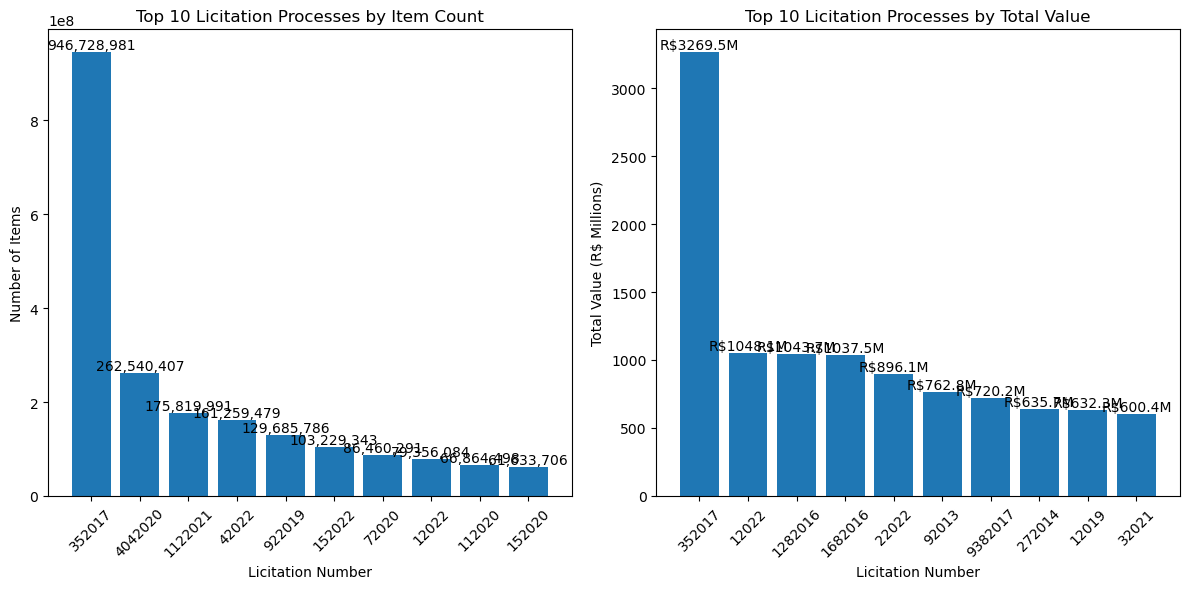


Top 10 Licitation Processes by Item Count:
Licitation 352017.0: 946,728,981.0 items
Licitation 4042020.0: 262,540,407.0 items
Licitation 1122021.0: 175,819,991.0 items
Licitation 42022.0: 161,259,479.0 items
Licitation 922019.0: 129,685,786.0 items
Licitation 152022.0: 103,229,343.0 items
Licitation 72020.0: 86,460,291.0 items
Licitation 12022.0: 79,356,084.0 items
Licitation 112020.0: 66,864,498.0 items
Licitation 152020.0: 61,633,706.0 items

Top 10 Licitation Processes by Total Value:
Licitation 352017.0: R$ 3269.47M
Licitation 12022.0: R$ 1048.12M
Licitation 1282016.0: R$ 1043.75M
Licitation 1682016.0: R$ 1037.52M
Licitation 22022.0: R$ 896.10M
Licitation 92013.0: R$ 762.76M
Licitation 9382017.0: R$ 720.22M
Licitation 272014.0: R$ 635.72M
Licitation 12019.0: R$ 632.32M
Licitation 32021.0: R$ 600.39M


In [4]:
# Convert Quantidade Item to integer and Valor Item to float
df_itens['Quantidade Item'] = df_itens['Quantidade Item'].astype(int)
df_itens['Valor Item'] = pd.to_numeric(df_itens['Valor Item'].astype(str).str.replace(',', '.'), errors='coerce')

# Calculate total items and value per licitation
licitation_stats = df_itens.groupby('Número Licitação').agg({
    'Quantidade Item': 'sum',
    'Valor Item': 'sum'
}).reset_index()

# Sort by quantity and get top 10
top_10_by_quantity = licitation_stats.sort_values('Quantidade Item', ascending=False).head(10)

# Sort by value and get top 10
top_10_by_value = licitation_stats.sort_values('Valor Item', ascending=False).head(10)

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot top 10 by quantity
ax1.bar(top_10_by_quantity['Número Licitação'].astype(str), 
        top_10_by_quantity['Quantidade Item'])
ax1.set_title('Top 10 Licitation Processes by Item Count')
ax1.set_xlabel('Licitation Number')
ax1.set_ylabel('Number of Items')
ax1.tick_params(axis='x', rotation=45)
# Add value labels on top of bars
for i, v in enumerate(top_10_by_quantity['Quantidade Item']):
    ax1.text(i, v, f'{v:,}', ha='center', va='bottom')

# Plot top 10 by value
ax2.bar(top_10_by_value['Número Licitação'].astype(str), 
        top_10_by_value['Valor Item'] / 1_000_000)  # Convert to millions
ax2.set_title('Top 10 Licitation Processes by Total Value')
ax2.set_xlabel('Licitation Number')
ax2.set_ylabel('Total Value (R$ Millions)')
ax2.tick_params(axis='x', rotation=45)
# Add value labels on top of bars
for i, v in enumerate(top_10_by_value['Valor Item'] / 1_000_000):
    ax2.text(i, v, f'R${v:.1f}M', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print numerical results
print("\nTop 10 Licitation Processes by Item Count:")
for _, row in top_10_by_quantity.iterrows():
    print(f"Licitation {row['Número Licitação']}: {row['Quantidade Item']:,} items")

print("\nTop 10 Licitation Processes by Total Value:")
for _, row in top_10_by_value.iterrows():
    print(f"Licitation {row['Número Licitação']}: R$ {row['Valor Item']/1_000_000:.2f}M")


## The number of items auctioned in licitation process 352017 is eye-catching. Why do we have such a high number of items auctioned?

In [5]:
# Filter for auction number 352017
items = df_itens[df_itens['Número Licitação'] == 352017]

# Display relevant columns
print("\nItems from Auction 352017:")
print(items[['Descrição', 'Quantidade Item', 'Valor Item', 'Nome Vencedor']].to_string())

# Optional: Display total number of items and total value
total_items = items['Quantidade Item'].sum()
# Convert Valor Item to numeric first, then sum
total_value = pd.to_numeric(items['Valor Item'].astype(str).str.replace(',', '.'), errors='coerce').sum()

print(f"\nTotal number of items: {total_items}")
print(f"Total value: R$ {total_value:,.2f}")


Items from Auction 352017:
                                                                                                                      Descrição  Quantidade Item    Valor Item                                                                  Nome Vencedor
802869                                                                                                       SERVICO ENGENHARIA                1  5.184000e+06                                                 JS CONSTRUTORA E LOCADORA LTDA
802870                                                                                                       DOSIMETRIA PESSOAL              369  3.697380e+04                           METROBRAS - METROLOGIA DAS RADIACOES IONIZANTES LTDA
802871                                                                                                       DOSIMETRIA PESSOAL              145  1.522500e+04                           METROBRAS - METROLOGIA DAS RADIACOES IONIZANTES LTDA
808573              

# The high number of items appears to be due to unconventional unit measures for oil purchases, as shown in the data below:

| Item ID | Description | Quantity | Value (R$) | Winner |
|---------|-------------|----------|------------|---------|
| 922837 | ÓLEO DIESEL | 113,664,357 | 394.42M | ATEM'S DISTRIBUIDORA DE PETROLEO S.A. |
| 922838 | ÓLEO DIESEL | 192,622,250 | 631.80M | ATEM'S DISTRIBUIDORA DE PETROLEO S.A. |
| 922839 | ÓLEO DIESEL | 142,175,127 | 477.85M | ATEM'S DISTRIBUIDORA DE PETROLEO S.A. |
| 922840 | ÓLEO DIESEL | 51,035,752 | 181.03M | ATEM'S DISTRIBUIDORA DE PETROLEO S.A. |
| 922841 | ÓLEO DIESEL | 151,657,829 | 511.31M | ATEM'S DISTRIBUIDORA DE PETROLEO S.A. |
| 922842 | ÓLEO DIESEL | 40,290,760 | 134.08M | ATEM'S DISTRIBUIDORA DE PETROLEO S.A. |
| 922843 | ÓLEO DIESEL | 48,765,309 | 164.85M | ATEM'S DISTRIBUIDORA DE PETROLEO S.A. |
| 922844 | ÓLEO DIESEL | 125,622,134 | 417.42M | ATEM'S DISTRIBUIDORA DE PETROLEO S.A. |
| 922845 | ÓLEO DIESEL | 80,822,234 | 274.87M | ATEM'S DISTRIBUIDORA DE PETROLEO S.A. |

# Understanding the Código Item Compra (Purchase Item Code)

The `Código Item Compra` is a 22-digit code that uniquely identifies each item in a procurement process. The code is structured as follows:

| Position | Digits | Field | Description |
|----------|--------|-------|-------------|
| 1-6 | 6 | Unidade Gestora | Managing Unit code that identifies the government unit responsible for the procurement |
| 7-8 | 2 | Modalidade de compra | Purchase modality indicating the type of procurement process used |
| 9-13 | 5 | Número da licitação | Sequential number of the bid within the year |
| 14-17 | 4 | Ano da licitação | Year when the bid was conducted |
| 18-22 | 5 | Sequencial do item | Sequential number identifying the specific item within the bid |

### Example
Code: `1701200500001201200001`

| Field | Value | Description |
|-------|-------|-------------|
| Managing Unit | 170120 | Managing Unit code |
| Purchase modality | 05 | Purchase modality |
| Bid number | 00012 | Bid number |
| Year | 0120 | Year 2020 |
| Item sequence | 00001 | First item in the bid |

# Analyzing Top 10 Most Expensive Items

In this analysis, we examine the 10 most valuable items from our procurement dataset. For each item, we:

1. Extract key information:
   - Item ID (last 5 digits of the purchase code)
   - Bid number
   - Item description (in Portuguese)
   - Quantity
   - Value in Brazilian Reais (R$)

2. Translate descriptions to English using Google Translate API
   Note: Translations are automated and may contain errors, especially for technical terms or specialized vocabulary

3. Present the results in a formatted table showing:
   - Original Portuguese descriptions
   - English translations
   - Quantities and values

This analysis helps identify the highest-value purchases in the dataset and makes the information more accessible to English speakers.

In [6]:
from googletrans import Translator

# Initialize translator
translator = Translator()

# Get top 10 items by value
top_10_items = df_itens.nlargest(10, 'Valor Item')

# Create a new dataframe for display
display_df = pd.DataFrame()

# Process each item
for _, item in top_10_items.iterrows():
    item_id = item['Código Item Compra'][-5:]  # Get last 5 digits (Item Sequence)
    licitacao = item['Número Licitação']
    desc_pt = item['Descrição']
    quantity = item['Quantidade Item']
    
    # Translate description to English
    try:
        translation = translator.translate(desc_pt, dest='en')
        desc_en = translation.text
    except:
        desc_en = desc_pt  # Use original if translation fails
        
    value = item['Valor Item']
    
    # Add to display dataframe
    display_df = pd.concat([display_df, pd.DataFrame({
        'Licitação': [licitacao],
        'Item ID': [item_id],
        'Description (PT)': [desc_pt],
        'GoogleTranslate Description (EN)': [desc_en],
        'Quantity': [quantity],
        'Value (R$)': [value]
    })])

# Format the display
pd.set_option('display.max_colwidth', 50)
pd.set_option('display.float_format', lambda x: f'R$ {x:,.2f}')

print("\nTop 10 Items by Value:")
print(display_df.to_string(index=False))


Top 10 Items by Value:
 Licitação Item ID                                                                               Description (PT)                                                   GoogleTranslate Description (EN)  Quantity        Value (R$)
   9382017   00001 ADMINISTRACAO DE TIQUETE ( TICKET ) / VALE ALIMENTACAO (CAR-TAO ELETRONICO) - SISTEMA CONVENIO Ticket Administration (Ticket) / Food Valley (Electronic Card) - System Convention         1 R$ 720,223,697.24
    352017   00002                                                                                   ÓLEO DIESEL.                                                                        Diesel oil. 192622250 R$ 631,800,980.00
    872016   00001                                                                       LOCACAO GERADOR ELETRICO                                                          Electric Generator Rental         1 R$ 580,999,000.00
    272014   00001                   ASSISTENCIA MEDICA - HOSPITALAR / DOMIC